<a href="https://colab.research.google.com/github/shakeebbmw/INSE-6220-Project/blob/main/6220_project(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
pip install pandas matplotlib seaborn scikit-learn

In [52]:
import pandas as pd

# Load the dataset
file_path = "winequality-red.csv"
data = pd.read_csv(file_path, sep=";")  # The file uses ";" as a delimiter

# View the first few rows
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [53]:
# Check column names, data types, and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [54]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [55]:
# View unique values and their counts in the 'quality' column
print(data["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [56]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


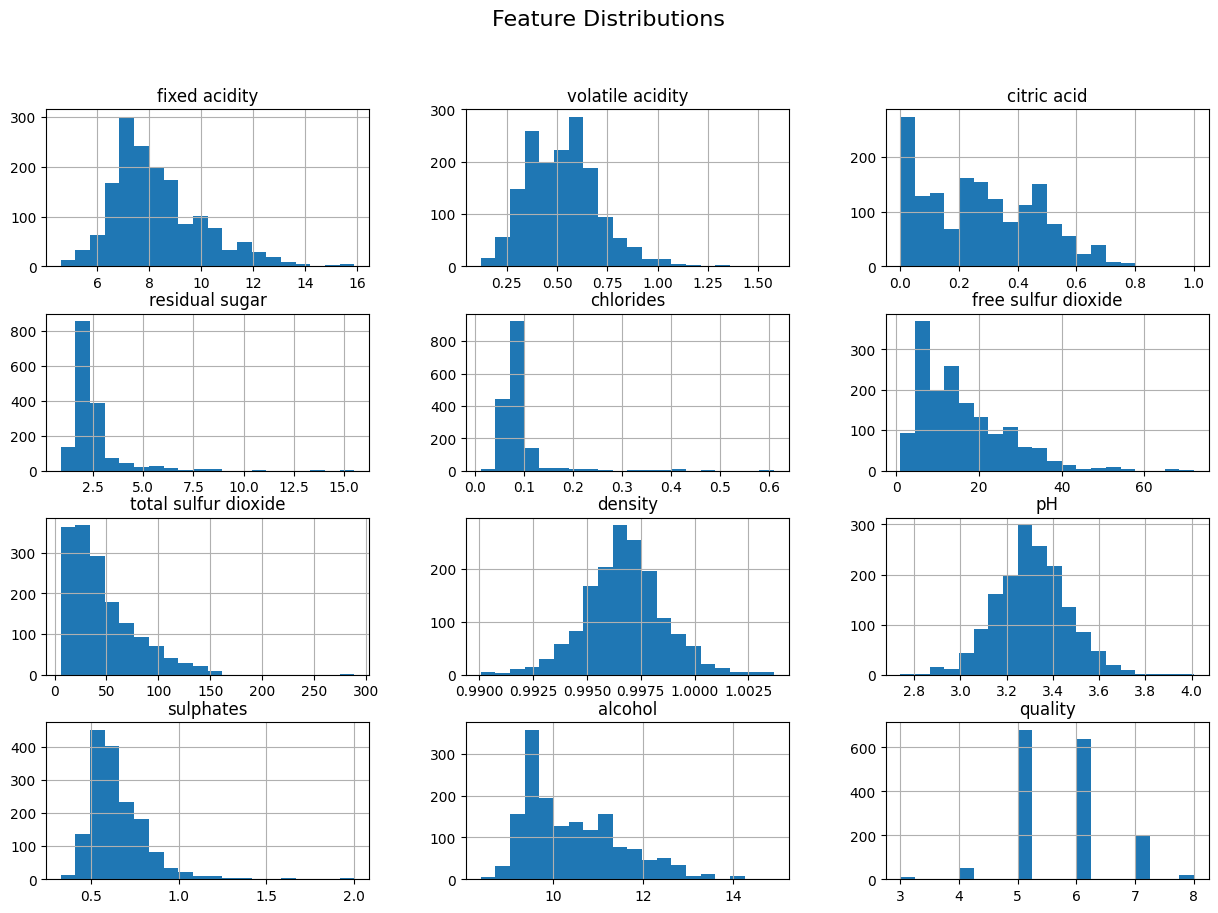

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

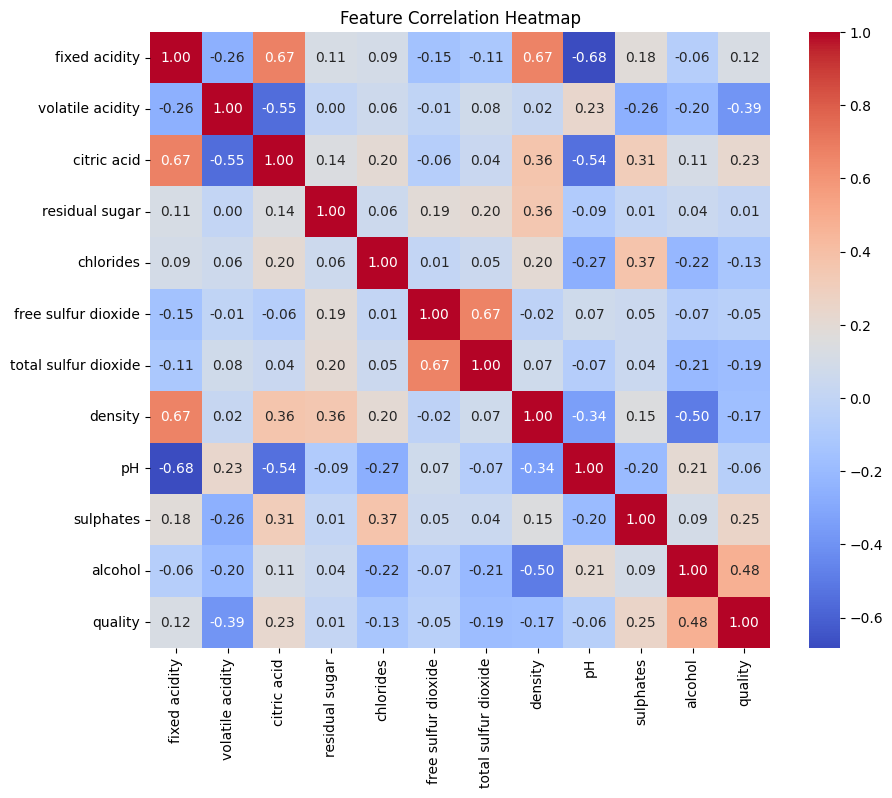

In [58]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


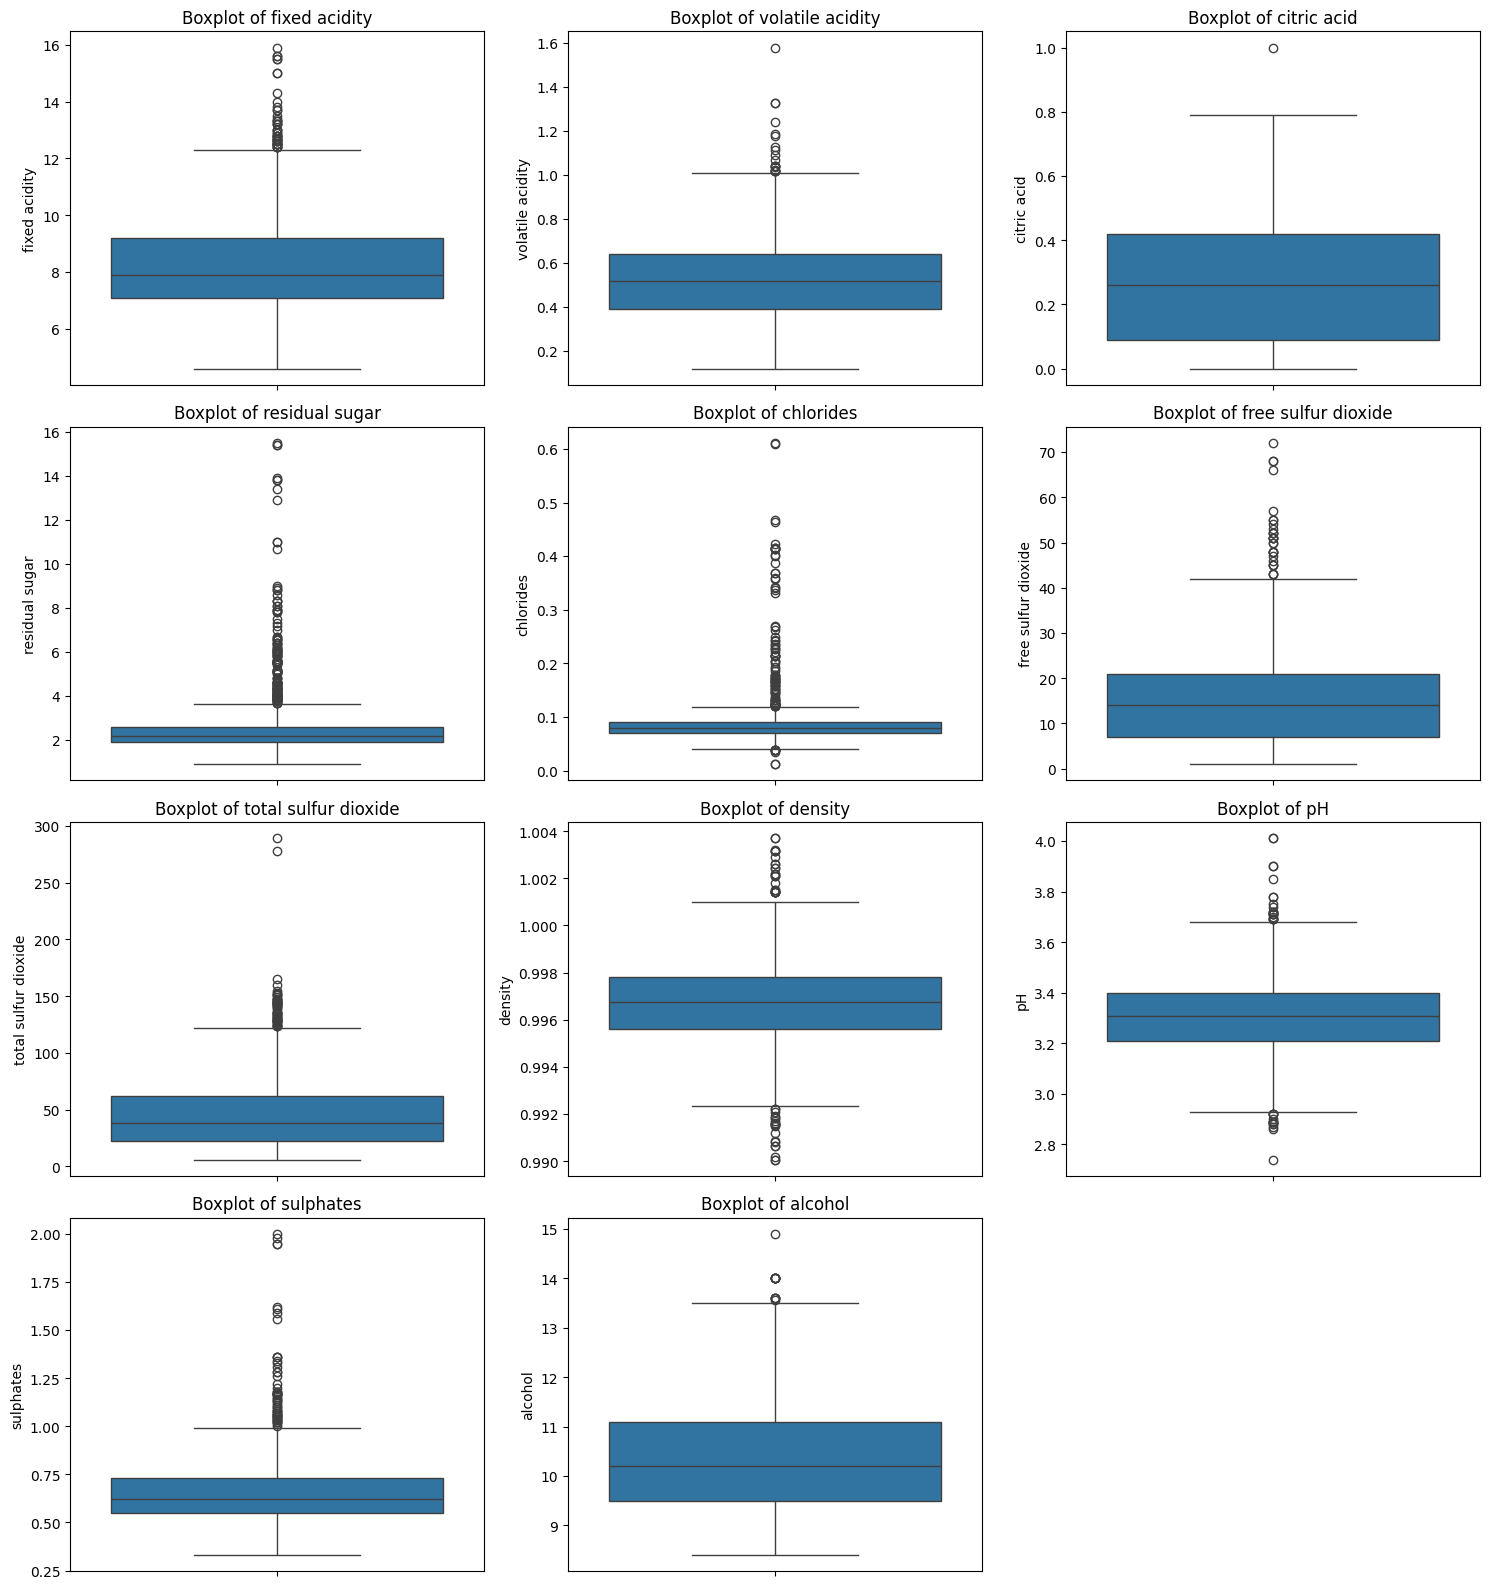

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of features (excluding 'quality')
num_features = len(data.columns[:-1])

# Determine grid size (rows x cols)
cols = 3  # Adjustable for wider or narrower plots
rows = math.ceil(num_features / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size dynamically
axes = axes.flatten()  # Flatten to handle indexing easily

# Plot each feature as a boxplot
for i, column in enumerate(data.columns[:-1]):  # Exclude 'quality'
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel("")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing
plt.show()


In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Copy data to avoid overwriting
data_cleaned = data.copy()

# Define IQR method to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of features to clean based on boxplots
outlier_features = ['residual sugar', 'chlorides', 'free sulfur dioxide',
                    'total sulfur dioxide', 'volatile acidity', 'fixed acidity', 'sulphates']

# Apply outlier removal
for feature in outlier_features:
    data_cleaned = remove_outliers(data_cleaned, feature)

# Drop low-correlation features
data_cleaned = data_cleaned.drop(columns=['density', 'free sulfur dioxide'])

# Separate features and target
X = data_cleaned.drop(columns=['quality'])
y = data_cleaned['quality']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final clean dataset
print("Cleaned and Scaled Features Shape:", X_scaled.shape)
print("Remaining Features:", X.columns)


Cleaned and Scaled Features Shape: (1171, 9)
Remaining Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


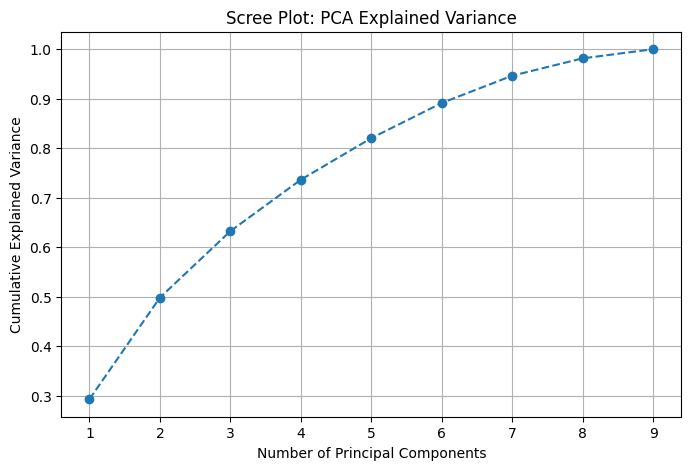

Principal Component 1: Cumulative Variance Explained = 0.29
Principal Component 2: Cumulative Variance Explained = 0.50
Principal Component 3: Cumulative Variance Explained = 0.63
Principal Component 4: Cumulative Variance Explained = 0.74
Principal Component 5: Cumulative Variance Explained = 0.82
Principal Component 6: Cumulative Variance Explained = 0.89
Principal Component 7: Cumulative Variance Explained = 0.95
Principal Component 8: Cumulative Variance Explained = 0.98
Principal Component 9: Cumulative Variance Explained = 1.00


In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot: PCA Explained Variance")
plt.grid()
plt.show()

# Print cumulative variance for each component
for i, variance in enumerate(explained_variance.cumsum()):
    print(f"Principal Component {i+1}: Cumulative Variance Explained = {variance:.2f}")


Transformed Data Shape: (1171, 6)


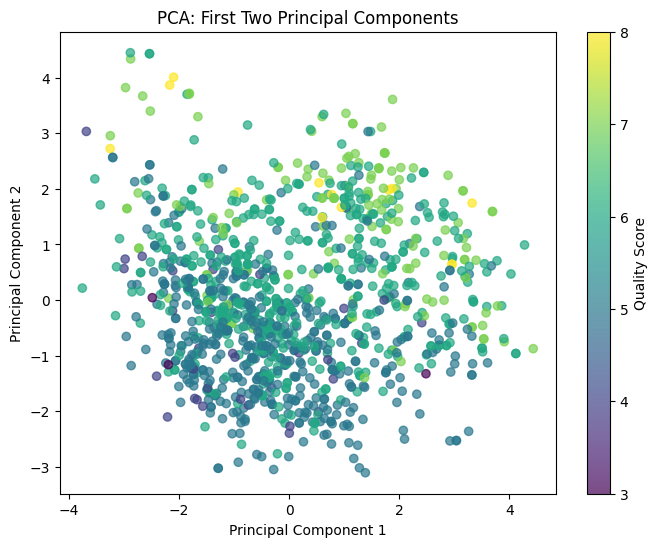

In [62]:
# Retain the first 6 principal components
pca_final = PCA(n_components=6)
X_pca_final = pca_final.fit_transform(X_scaled)

# Check the shape of the transformed data
print("Transformed Data Shape:", X_pca_final.shape)

# Visualize the first two principal components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.colorbar(label="Quality Score")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: 

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.62      0.70      0.66        92
           6       0.55      0.62      0.59       101
           7       0.72      0.39      0.51        33
           8       0.00      0.00      0.00         1

    accuracy                           0.60       235
   macro avg       0.32      0.29      0.29       235
weighted avg       0.58      0.60      0.58       235



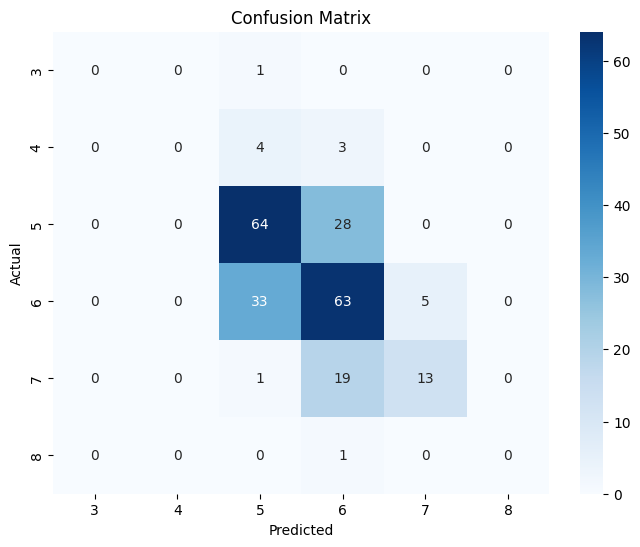

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.76      0.73        92
           6       0.63      0.71      0.67       101
           7       0.74      0.42      0.54        33
           8       0.50      1.00      0.67         1

    accuracy                           0.67       235
   macro avg       0.43      0.48      0.43       235
weighted avg       0.65      0.67      0.65       235



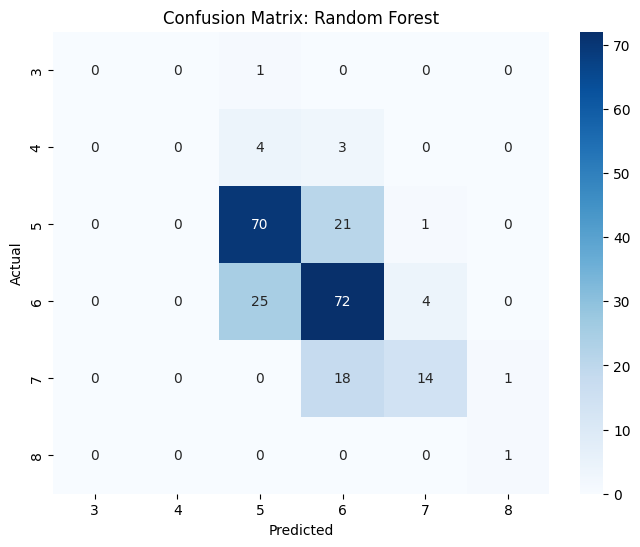

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model with class weighting
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn

Before Resampling:
quality
5    396
6    389
7    110
4     27
8     12
3      2
Name: count, dtype: int64
After Resampling:
quality
3    396
4    396
5    396
6    396
7    396
8    396
Name: count, dtype: int64

Starting hyperparameter tuning...

Progress: 1/24 - Time elapsed: 1.21 seconds - Best Score: 0.9933
Progress: 2/24 - Time elapsed: 5.41 seconds - Best Score: 0.9941
Progress: 3/24 - Time elapsed: 7.94 seconds - Best Score: 0.9941
Progress: 4/24 - Time elapsed: 11.28 seconds - Best Score: 0.9941
Progress: 5/24 - Time elapsed: 12.78 seconds - Best Score: 0.9941
Progress: 6/24 - Time elapsed: 15.45 seconds - Best Score: 0.9941
Progress: 7/24 - Time elapsed: 16.67 seconds - Best Score: 0.9941
Progress: 8/24 - Time elapsed: 18.91 seconds - Best Score: 0.9941
Progress: 9/24 - Time elapsed: 19.88 seconds - Best Score: 1.0000
Progress: 10/24 - Time elapsed: 21.65 seconds - Best Score: 1.0000
Progress: 11/24 - Time elapsed: 22.30 seconds - Best Score: 1.0000
Progress: 12/24 - Time ela

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


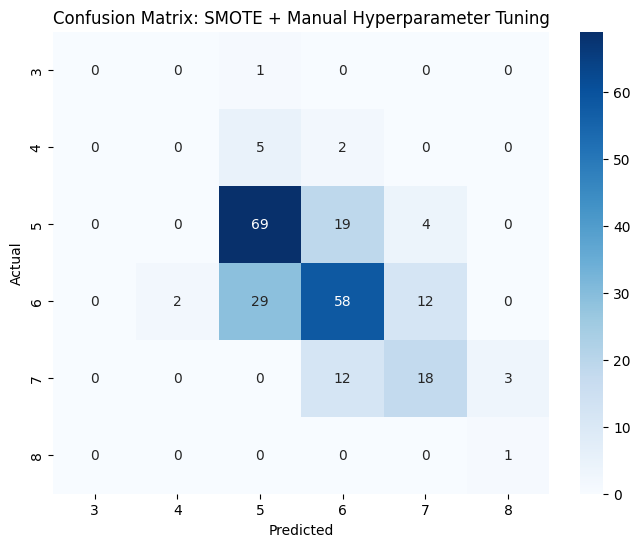

In [65]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

# Balance dataset using SMOTE + undersampling
smote = SMOTE(k_neighbors=1, random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Apply SMOTE to oversample and undersample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

print("Before Resampling:")
print(y_train.value_counts())
print("After Resampling:")
print(pd.Series(y_resampled).value_counts())

# Manual parameter grid for Random Forest
param_grid = ParameterGrid({
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
})

# Progress tracking
total_combinations = len(param_grid)
start_time = time.time()

# Track the best model
best_score = 0
best_params = None
best_rf = None

print("\nStarting hyperparameter tuning...\n")

for i, params in enumerate(param_grid):
    # Train Random Forest with current parameters
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_resampled, y_resampled)

    # Evaluate model on training data
    score = rf.score(X_resampled, y_resampled)

    # Update best model if current is better
    if score > best_score:
        best_score = score
        best_params = params
        best_rf = rf

    # Progress tracking
    elapsed_time = time.time() - start_time
    print(f"Progress: {i + 1}/{total_combinations} - Time elapsed: {elapsed_time:.2f} seconds - Best Score: {best_score:.4f}")

# Print best parameters and score
print("\nBest Parameters:", best_params)
print("Best Score on Training Data:", best_score)

# Predictions on test data
y_pred_rf_resampled = best_rf.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_resampled))

# Confusion Matrix
cm_rf_resampled = confusion_matrix(y_test, y_pred_rf_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_resampled, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: SMOTE + Manual Hyperparameter Tuning")
plt.show()


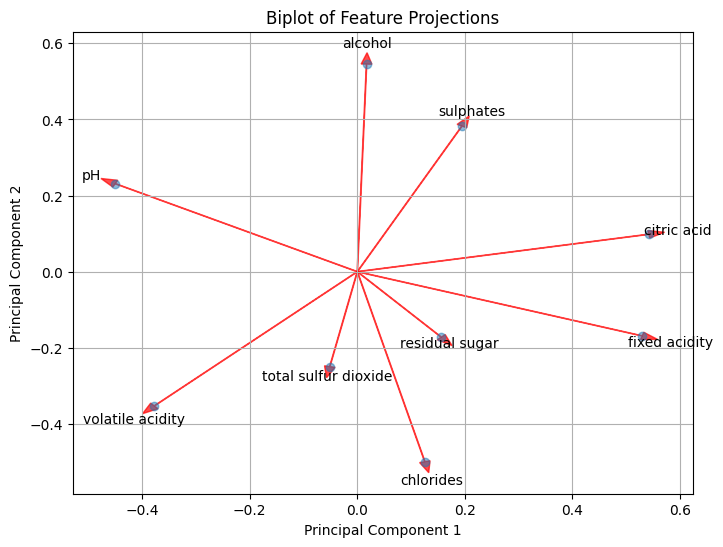

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


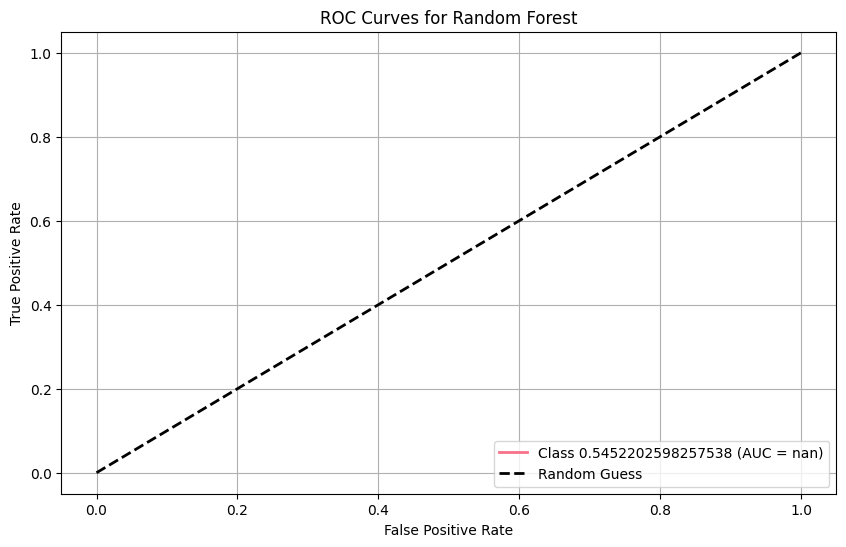

In [68]:
# Optional Enhancements: Additional Visualizations and Models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Biplots: Visualize feature projections onto principal components
pca = PCA(n_components=6)  # Use previously applied PCA
X_pca_full = pca.fit_transform(X_scaled)
components = pca.components_.T

plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(zip(components[:, 0], components[:, 1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.7, head_width=0.02)
    plt.text(x * 1.1, y * 1.1, X.columns[i], fontsize=10, ha='center', va='center')
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of Feature Projections')
plt.grid()
plt.show()

# ROC Curves: Evaluate models with ROC and AUC metrics

# Ensure y_test is in the correct format (e.g., array or Series)
if isinstance(y_test, np.ndarray):
    y_test = y_test.flatten()
elif isinstance(y_test, pd.Series):
    y_test = y_test.values

# Correctly fetch unique classes from y (original target variable)
unique_classes = sorted(np.unique(y))

# Binarize target labels
y_bin = label_binarize(y_test, classes=unique_classes)
n_classes = y_bin.shape[1]

# Random Forest Prediction (as example)
y_pred_proba = rf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", n_classes)
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {unique_classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()
